In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import files
files.upload()  # This will prompt you to select the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hack001","key":"0aa99cbd130ae632f1c01e6241b29398"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [5]:
import pandas as pd
import cv2

# Load the CSV files
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

# Drop NA values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Load images using their paths
def load_images(df):
    images = []
    labels = df['ClassId'].values
    for img_path in df['Path'].values:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    return images, labels

train_images, train_labels = load_images(train_df)
test_images, test_labels = load_images(test_df)


In [6]:
# Resize images to a common size, e.g., 32x32
def resize_images(img_list):
    return [cv2.resize(img, (32, 32)) for img in img_list]

train_images = resize_images(train_images)
test_images = resize_images(test_images)

# Normalize images
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1226/1226 [==============================] - 75s 60ms/step - loss: 2.5724 - accuracy: 0.3420 - val_loss: 1.5438 - val_accuracy: 0.5897
Epoch 2/10
1226/1226 [==============================] - 70s 57ms/step - loss: 1.1964 - accuracy: 0.6631 - val_loss: 0.8632 - val_accuracy: 0.7825
Epoch 3/10
1226/1226 [==============================] - 73s 60ms/step - loss: 0.7061 - accuracy: 0.7989 - val_loss: 0.6298 - val_accuracy: 0.8521
Epoch 4/10
1226/1226 [==============================] - 69s 57ms/step - loss: 0.4819 - accuracy: 0.8650 - val_loss: 0.5099 - val_accuracy: 0.8827
Epoch 5/10
1226/1226 [==============================] - 74s 60ms/step - loss: 0.3605 - accuracy: 0.8996 - val_loss: 0.4349 - val_accuracy: 0.8987
Epoch 6/10
1226/1226 [==============================] - 68s 55ms/step - loss: 0.2806 - accuracy: 0.9226 - val_loss: 0.4225 - val_accuracy: 0.8996
Epoch 7/10
1226/1226 [==============================] - 71s 58ms/step - loss: 0.2296 - accuracy: 0.9370 - val_loss: 0.3633 -

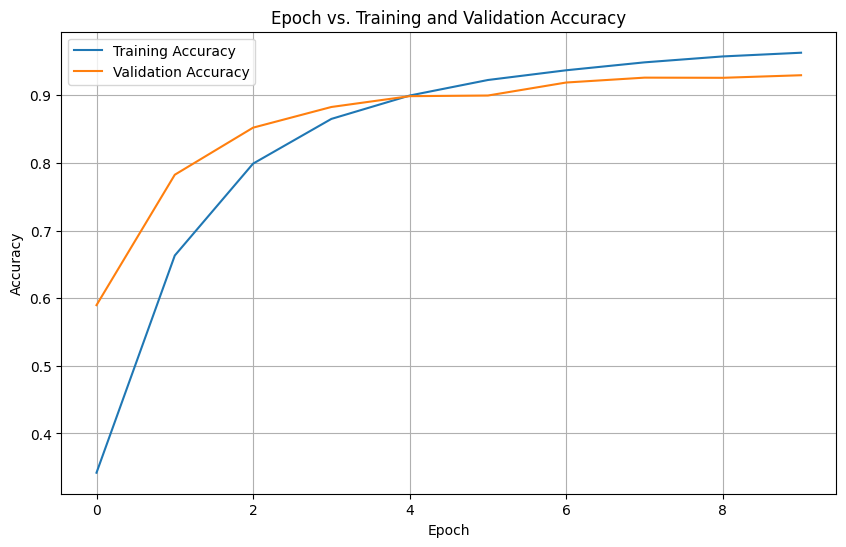

In [14]:
import matplotlib.pyplot as plt

# Assuming you have a history object from model.fit
# history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

def plot_training_accuracy(history):
    # Plotting training accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Epoch vs. Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# To call the function, use:
plot_training_accuracy(history)


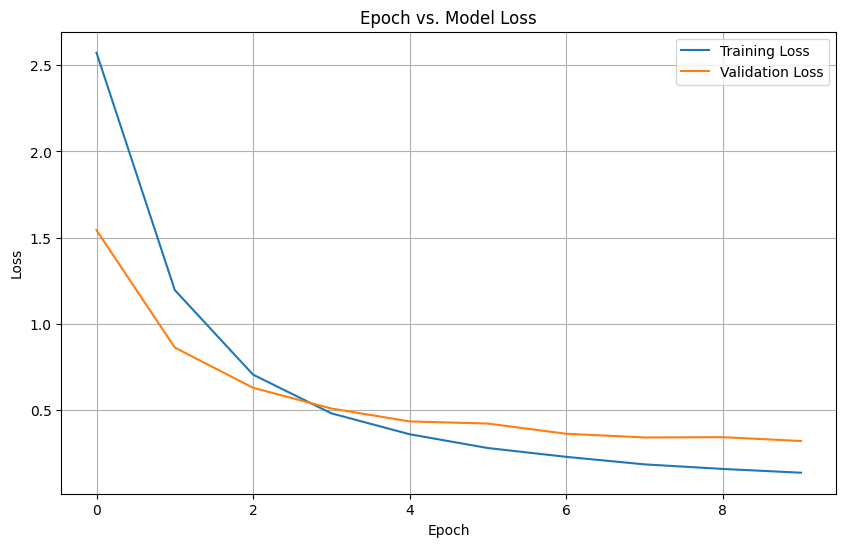

In [15]:
import matplotlib.pyplot as plt

def plot_training_loss(history):
    # Plotting training loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Epoch vs. Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

plot_training_loss(history)

In [9]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_classes))


395/395 [==============================] - 6s 14ms/step
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        60
           1       0.90      0.96      0.93       720
           2       0.94      0.95      0.94       750
           3       0.93      0.94      0.94       450
           4       0.93      0.94      0.94       660
           5       0.90      0.90      0.90       630
           6       0.99      0.80      0.89       150
           7       0.94      0.83      0.88       450
           8       0.87      0.93      0.90       450
           9       0.96      0.96      0.96       480
          10       0.97      0.98      0.97       660
          11       0.89      0.93      0.91       420
          12       0.97      0.98      0.98       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.94      0.98      0.96       210
          16       0.97  

In [19]:
# Upload an image using Google Colab's upload function
from google.colab import files
uploaded = files.upload()

# Read and preprocess the uploaded image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32, 32))
img = np.array(img) / 255.0
img = np.expand_dims(img, axis=0)

# Predict the class of the uploaded image
pred = model.predict(img)
predicted_class = np.argmax(pred, axis=1)
print(f"Predicted Class: {predicted_class[0]}")


Saving 10.png to 10.png
1/1 [==============================] - 0s 24ms/step
Predicted Class: 10
